In [31]:
pip install lime
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=17a1fd40e7a75bfca58971a0b32b66d14680085a099ad6884e725b734b82c1ac
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [39]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from lime import lime_tabular
import shap

In [20]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
print(df.describe())
print(df.isnull().sum())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
pet

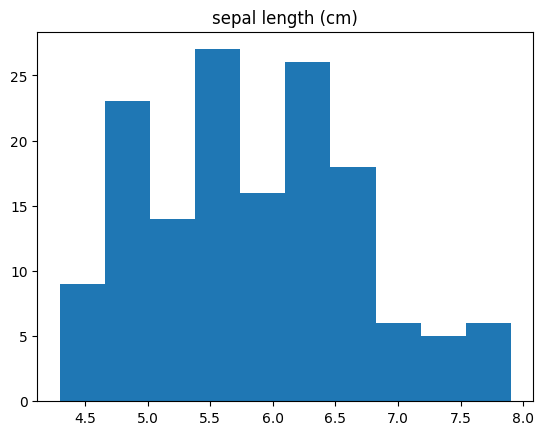

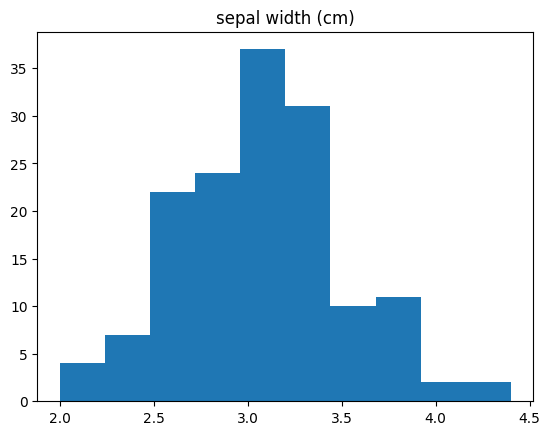

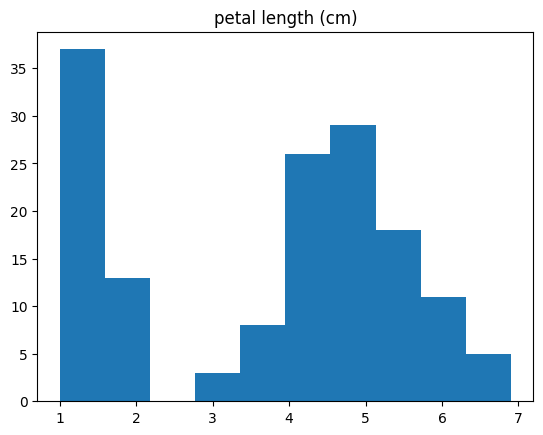

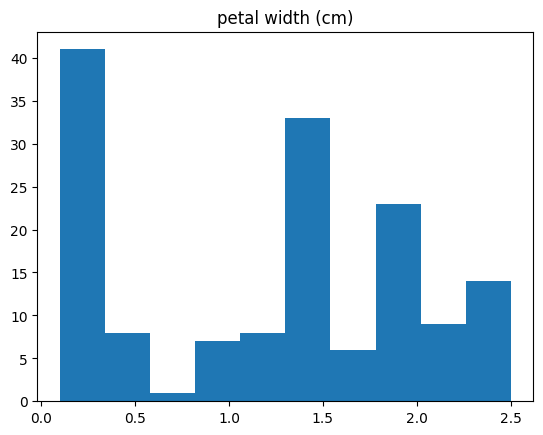

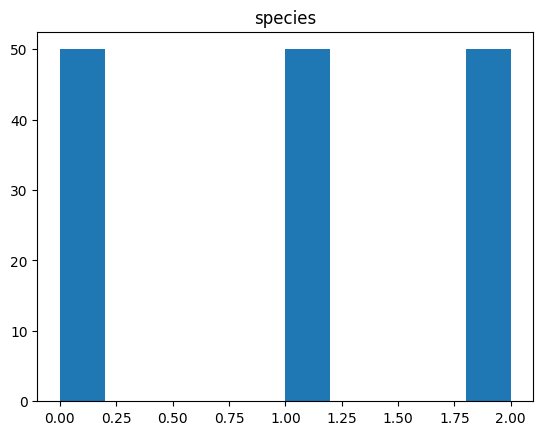

In [22]:
#distribution of each feature
for col in df.columns:
  plt.hist(df[col], bins=10)
  plt.title(col)
  plt.show()

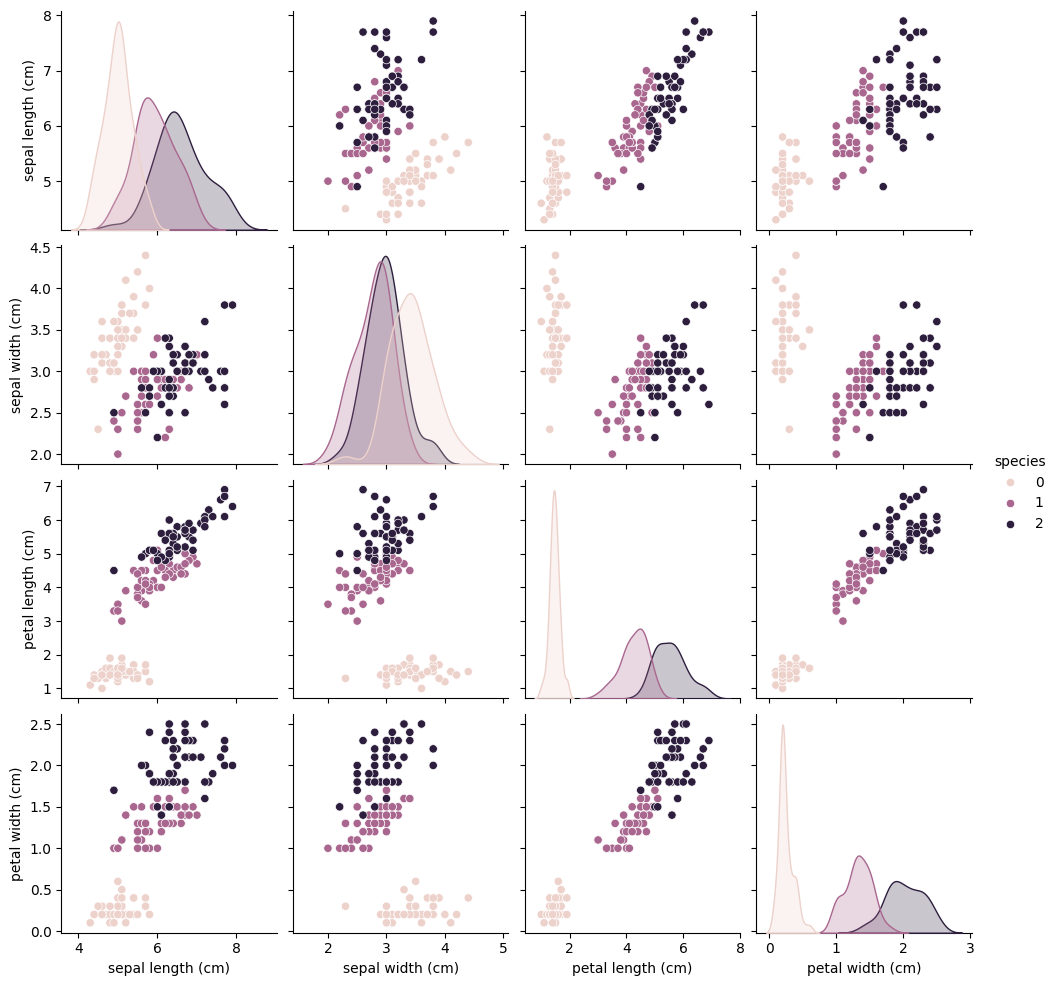

In [23]:
#relationship between features
sns.pairplot(df, hue='species')
plt.show()

In [24]:
X = iris.data
y = iris.target

In [26]:

rf = RandomForestClassifier()
rf.fit(X, y)


RandomForestClassifier()

In [48]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [49]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X,
    mode="classification",
    feature_names=iris.feature_names,
    class_names=iris.target_names,
)

# Explain a prediction for a single instance
instance = X[0]
explanation = explainer.explain_instance(
    instance, rf.predict_proba, num_features=5
)

explanation.show_in_notebook()